# Recourses:

1. [Recourse-1](https://mljar.com/blog/feature-importance-in-random-forest/)
2. SHAP documentations:
 - [Wiki](https://en.wikipedia.org/wiki/Shapley_value)
 - [Recourse-2](https://shap.readthedocs.io/en/latest/index.html)
 - [Resource-3](https://medium.com/geekculture/shapley-value-explaining-ai-190cd836a045)
 - [Shap GitHub/Documentation](https://shap.readthedocs.io/en/latest/index.html)

# Feature importance

It is the contribution of the feature in the prediction. In random forest and most of tree-based algorithms, there are typically three methods:

1. The impurity-based feature importance: It calculates the mean decrease impurity over nodes for the feature.
  - The disadvantages:
    - if 2 features are highly correlated, then it can select one and ignore another which may be is more important.
    - The drawbacks of the method is to tendency to prefer (select as important) numerical features and categorical features with high cardinality.
2. Permutation-based feature importance. A permutation of possible features and select the best one with the highest performing model.
  - The disadvantage:
    - Extensive computations. 
3. Tool-based feature importance (e.g., Shap)
  - The disadvantage:
    - Independence assumption. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

## Random Forest Built-in Feature Importance

In [ ]:
rf.feature_importances_

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Permutation Based Feature Importance (with scikit-learn)

In [ ]:
perm_importance = permutation_importance(rf, X_test, y_test)

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

## Shapley Value Explaining AI

The solution comes from game theory, and specifically Shapley values as introduced by Lord Shapley in the 1950s.

### Types of models:

#### White box/Grey box model:
These consist of models like Linear regression, Logistic regression ,Decision tree, Naïve Bayes and k-nearest neighbors etc. These models are considered more explainable at least in theory.

#### Black box Model:
Deep learning, Random Forest, Gradient boosting on the other hand are very difficult to explain or interpret.

### Model-agnostic methods:
- Examples: Shap, and  permutation based Feature Importance.
- They are methods you can use for any machine learning model:


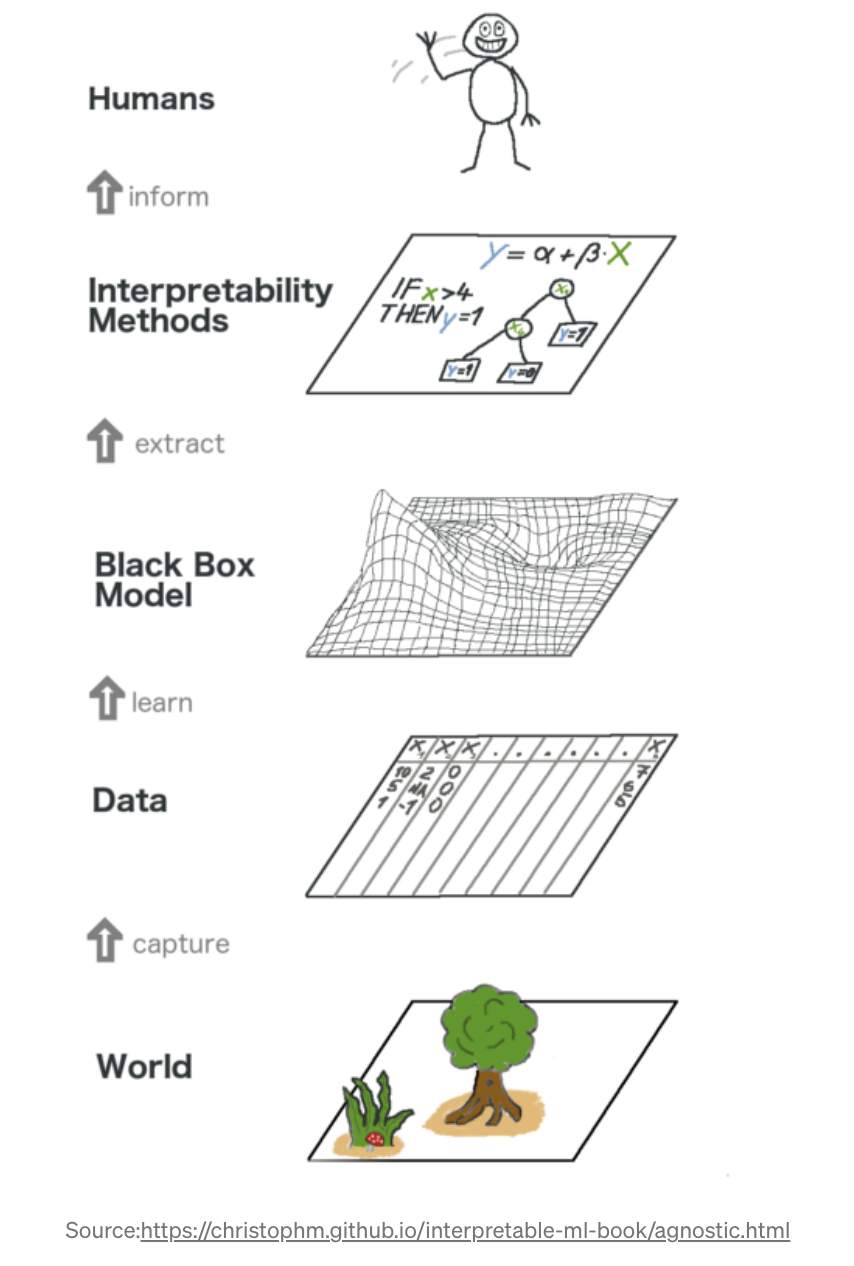

### [Game theory](https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/)

A “Game” is any situation in which there are several decision-makers, and each of them wants to optimize their results. 

#### Cooperative Game Theory
Cooperative game theory assumes that groups of players, called coalitions, are the primary units of decision-making, and may enforce cooperative behavior.

The Shapley value is a solution concept in cooperative game theory. It was named in honor of Lloyd Shapley, who introduced it in 1951 and won the Nobel Prize in Economics for it in 2012. To each cooperative game it assigns a unique distribution (among the players) of a total surplus generated by the coalition of all players. The Shapley value is characterized by a collection of desirable properties.


#### The idea of cooperative game theory (Example)
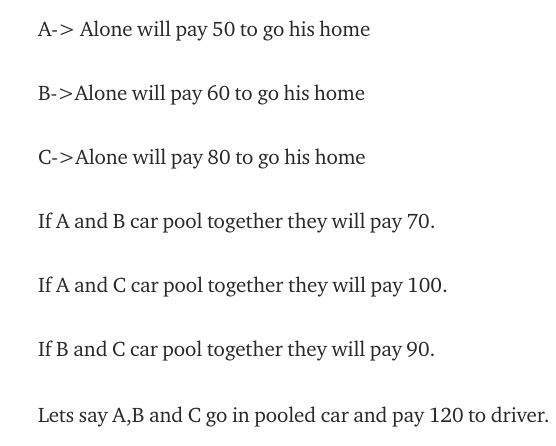

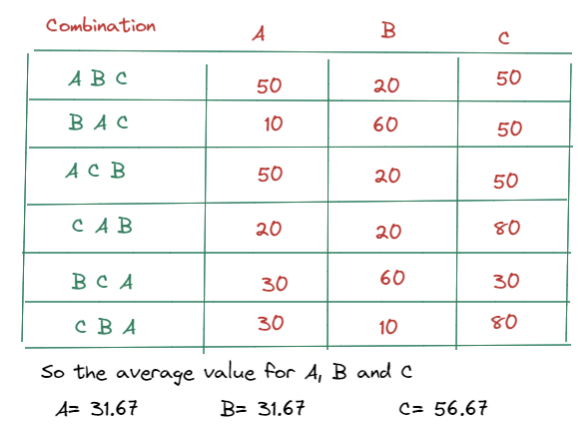

### [SHAP Principles](https://medium.com/@khalilz/interpretable-machine-learning-using-shap-theory-and-applications-26c12f7a7f1a)

We are explaining the contributions of each feature to an individual predicted value.

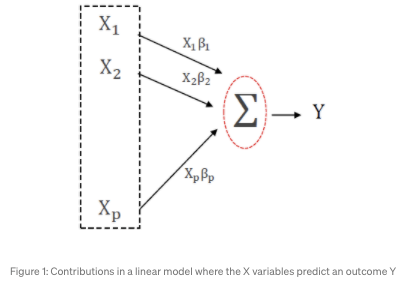

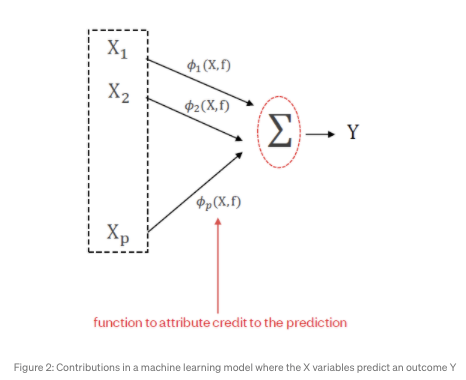

So how do we get the Phis (contributions of Xs in the probabilities)? (note the dependency of Phi with the data X, and the machine learning model f, in Figure 2) For illustration purposes, let’s imagine that we are using the algorithm to predict Y, the probability of having a future hospitalization, based on two variables X1 and X2:   

X1: The patient had a hospitalization in the past year       
X2: The patient visited the emergency room (ER) in the past year    

and that from this algorithm, we get an average predicted probability (of a future hospitalization) of 5%.

### Naive Illustration 

With SHAP, we are trying to explain an individual prediction. So let’s take the example of patient A and try to explain their probability of having a hospitalization. Let’s imagine that according to our machine learning model this probability is 27%. We can ask ourselves: how did we deviate from the average model prediction (5%), to get to patient A’s prediction (27%)?

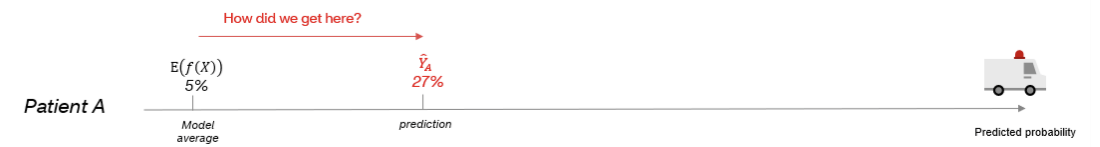
        

If we calculating E(f(X)|X1=1) and E(f(X)|X1=1,X2=1)

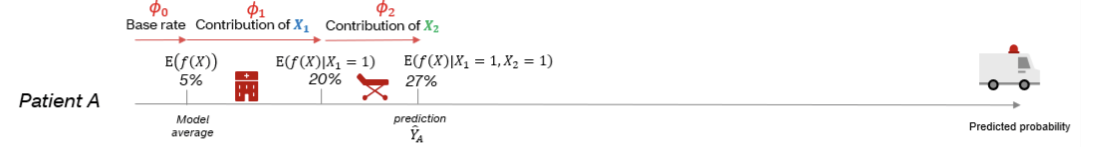


Ph1=15% and Ph2 = 7%    

So this time, we start to condition on X2 instead of X1.

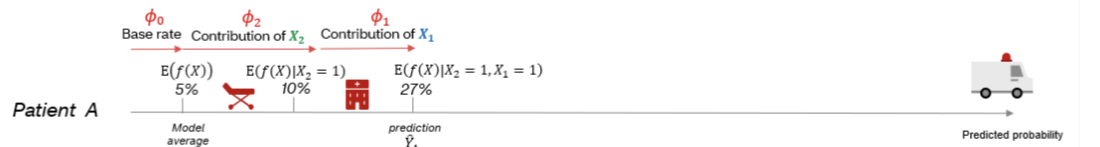

Phi1 (the contribution of the variable X1)= 17%      
And Phi2 (the contribution of the variable X2)=5%    


<b> The solution of the above problem is by using game theory, and specifically Shapley values as introduced by Lord Shapley in the 1950s. <b>

## Feature Importance Computed with SHAP Values

In [ ]:
import shap
shap.initjs()

# explain the model's predictions using SHAP
explainer = shap.Explainer(rf,X)
shap_values = explainer(X)

In [ ]:
# visualize the general contribution.
shap.plots.bar(shap_values,max_display=20)

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0],max_display=20)

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

If we take many force plot explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (in the notebook this plot is interactive):

In [ ]:
# visualize all the training set predictions
shap.plots.force(explainer.expected_value,shap_values.values[:],X.iloc[:])

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values,max_display=20)